# 프로젝트: 새로운 데이터셋으로 나만의 이미지 분류기 만들어보기

### Step 1. 데이터셋 내려받기
- 이번에는 tensorflow_datasets 에 포함된 tf_flowers 데이터를 사용해 보겠습니다. tf_flowers 데이터에 대한 정보는 다음에서 확인해볼 수 있습니다.
- tfds.load를 활용하여 데이터셋을 다운받으세요.
https://www.tensorflow.org/datasets/catalog/tf_flowers

### Step 2. 데이터셋을 모델에 넣을 수 있는 형태로 준비하기
- 이미지를 모두 같은 크기로 formatting 한 후, train_batches, validation_batches, test_batches를 준비합니다.

### Step 3. 모델 설계하기
- 모델은 어떤 방식으로 설계하고 싶은가요? 나만의 모델을 만들 것인가요, 아니면 base_model을 활용할 것인가요?
- 원하는 방식으로 모델을 만들어 보세요!
- cats_vs_dogs 의 경우와 달리, tf_flowers 데이터셋에서는 class의 갯수가 5가지입니다. 모델 설계시 어느 부분이 달라질지에 유의해 주세요. (마지막 )

### Step 4. 모델 학습시키기
- 모델을 학습시켜봅니다. 단, 여기에서는 여러 가지 옵션을 바꿔볼 수 있습니다.
- 예를 들어, 모델 학습을 10 epoch보다 더 많이 시켜보거나, learning_rate 값을 바꿔볼 수 있습니다.
- 또는, optimizer의 종류도 바꿔볼 수 있습니다. 바꿔보고 싶다면, 여기를 참고하세요.
- 어쩌면 VGG16이 아닌 다른 모델을 base model로 활용할 수도 있을 것입니다. 그리고 파인튜닝을 fc layer의 구성에 변화를 줄 수 있을지도 모릅니다.
- 이전 스텝에서는 시도하지 않았던 Regularization 기법이 적용된다면 어떨까요? Dropout이나 Batch Normalization을 적용하는 것은 그리 어려운 일이 아닙니다.

### Step 5. 모델 성능 평가하기
- 모델 학습이 완료되었다면, 모델의 성능을 평가할 차례입니다.
- 모델이 학습된 과정을 그래프로도 그려보고, validation_batches나 test_batches에 있는 데이터에 대한 예측 결과도 확인해 보세요!

### Step 6. 모델 활용하기
- 모델이 꽤나 똑똑해졌다면, 이제 활용해볼 수 있습니다.
- 원하는 이미지를 자유롭게 모델에 입력해 보고, 어떤 예측 결과를 내는지 확인해 보세요!

### import library

In [1]:

import tensorflow as tf

import tensorflow_datasets as tfds #?

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

import numpy as np

import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 경고 메시지 설정, 중요한 문제만 출력
import warnings
warnings.filterwarnings("ignore")


### Step 1. 데이터셋 내려받기

In [2]:
## tf flowers load

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

metadata

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.1,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

### tf_flowers
- 이미지
- 라벨 5가지(sunflower
- 3670개 샘플
- 

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


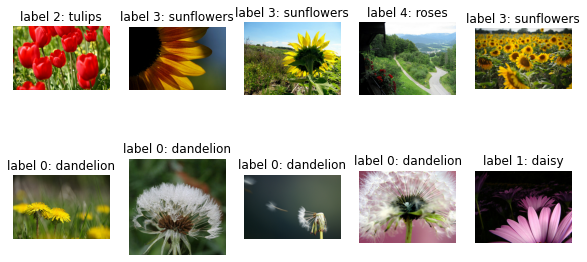

In [3]:
## data check
print(raw_train)
print(raw_validation)
print(raw_test)


plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

### Step 2. 데이터셋을 모델에 넣을 수 있는 형태로 준비하기

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>


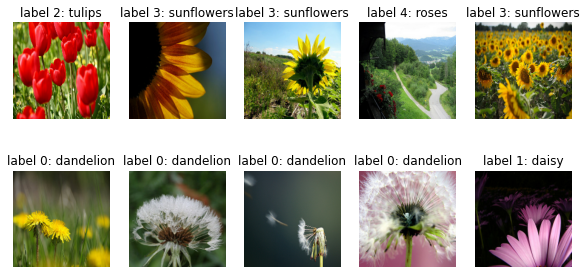

In [4]:
#img formatting

IMG_SIZE = 160

#img format fn define 

def img_format(img, label):
    img = tf.cast(img, tf.float32) #이미지 타입 캐스틍 tensor
    img = (img/127.5) -1 # 각 픽셀값 0~255 ===>  -1 ~ 1 스케일링
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    
    return img, label

# data formating
train = raw_train.map(img_format)
validation = raw_validation.map(img_format)
test = raw_test.map(img_format)

# formatted data check
print(train)
print(validation)
print(test)

plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [5]:
# batch 사이즈로 분리 및 train data shuffle

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE) # 랜덤해서 뽑기 
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

#data 분리 확인
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

### Step 3. 모델 설계하기

In [6]:
# model define

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)


In [7]:
#  VGG16 모델 가져오기
vgg16_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                      weights='imagenet')
#
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [8]:
### TODO 이해하기
#print(image_batch)
feature_batch = vgg16_model(image_batch)
feature_batch.shape


TensorShape([32, 5, 5, 512])

In [9]:
### TODO 이해하기
#flatten layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [10]:
### TODO 이해하기


global_average_layer= tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [11]:
# dense Layer 생성 및 붙이기

dense_layer = tf.keras.layers.Dense(512, activation='relu') # 
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')# 현재 flower 모델 클래스 종류가 5

#dens+predction
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)


(32, 5)


In [12]:
# 모델 최종 정의
vgg16_edit_model = tf.keras.Sequential([
  vgg16_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

vgg16_edit_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 14,979,909
Trainable params: 14,979,909
Non-trainable params: 0
_________________________________________________________________


### Step 4. 모델 학습시키기

In [13]:

#model1 / vgg16_model

'''
optimizer : RMSprop
loss: crossentropy
metrix : accuracy

'''

## vgg16 에 해당하는 ase_model은 학습을 시키지 않을 예정이니 학습 여부를 결정하는 trainable 변수를 False
vgg16_edit_model.trainable = True


# 0.0001 0.0003
base_learning_rate = 0.0001

,# optimizer 변경. RMSprop ,Adam
#loss categorical_hinge / categorical_crossentropy
vgg16_edit_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])




In [14]:
## 모델 검증

validation_steps=8 #           
# epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 
loss0, accuracy0 = vgg16_edit_model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


8/8 [==============================] - 0s 54ms/step - loss: 1.7625 - accuracy: 0.2461
initial loss: 1.76
initial accuracy: 0.25


In [15]:
EPOCHS = 15 # epoch 조정
history = vgg16_edit_model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 90s 975ms/step - loss: 1.3254 - accuracy: 0.4605 - val_loss: 1.2827 - val_accuracy: 0.5749
Epoch 2/15
92/92 [==============================] - 17s 190ms/step - loss: 0.8193 - accuracy: 0.7003 - val_loss: 0.9162 - val_accuracy: 0.6158
Epoch 3/15
92/92 [==============================] - 17s 184ms/step - loss: 0.5806 - accuracy: 0.7820 - val_loss: 0.6690 - val_accuracy: 0.7711
Epoch 4/15
92/92 [==============================] - 17s 184ms/step - loss: 0.5132 - accuracy: 0.8202 - val_loss: 1.6624 - val_accuracy: 0.7466
Epoch 5/15
92/92 [==============================] - 17s 185ms/step - loss: 0.4605 - accuracy: 0.8495 - val_loss: 0.7222 - val_accuracy: 0.7466
Epoch 6/15
92/92 [==============================] - 18s 191ms/step - loss: 0.3714 - accuracy: 0.8678 - val_loss: 0.2899 - val_accuracy: 0.8937
Epoch 7/15
92/92 [==============================] - 18s 193ms/step - loss: 0.3558 - accuracy: 0.8794 - val_loss: 0.4828 - val_accuracy: 0.8583

### Step 5. 모델 성능 평가하기

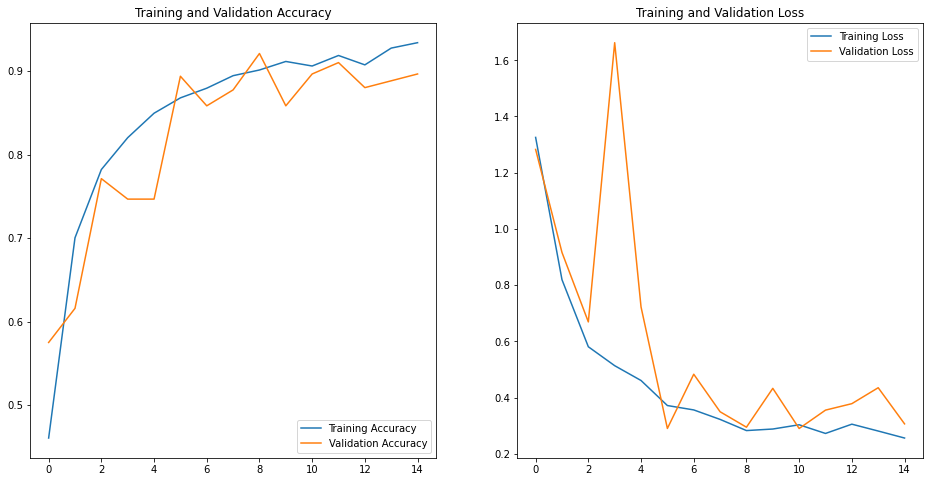

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
loss0, accuracy0 = vgg16_edit_model.evaluate(test_batches, steps = 8)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

8/8 [==============================] - 0s 54ms/step - loss: 0.3305 - accuracy: 0.8789
initial loss: 0.33
initial accuracy: 0.88


In [18]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = vgg16_edit_model.predict(image_batch)
    pass


In [19]:
## argmax : index array 가장큰수의 index 리턴 ,  axis: 축 기준 0 x ,1 y
#라 벨 변환
prediction2 = np.argmax(predictions, axis=1)
prediction2

array([2, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 3, 2, 0, 3, 2, 0, 2, 4, 2, 0,
       2, 0, 1, 3, 2, 2, 2, 3, 0, 4])

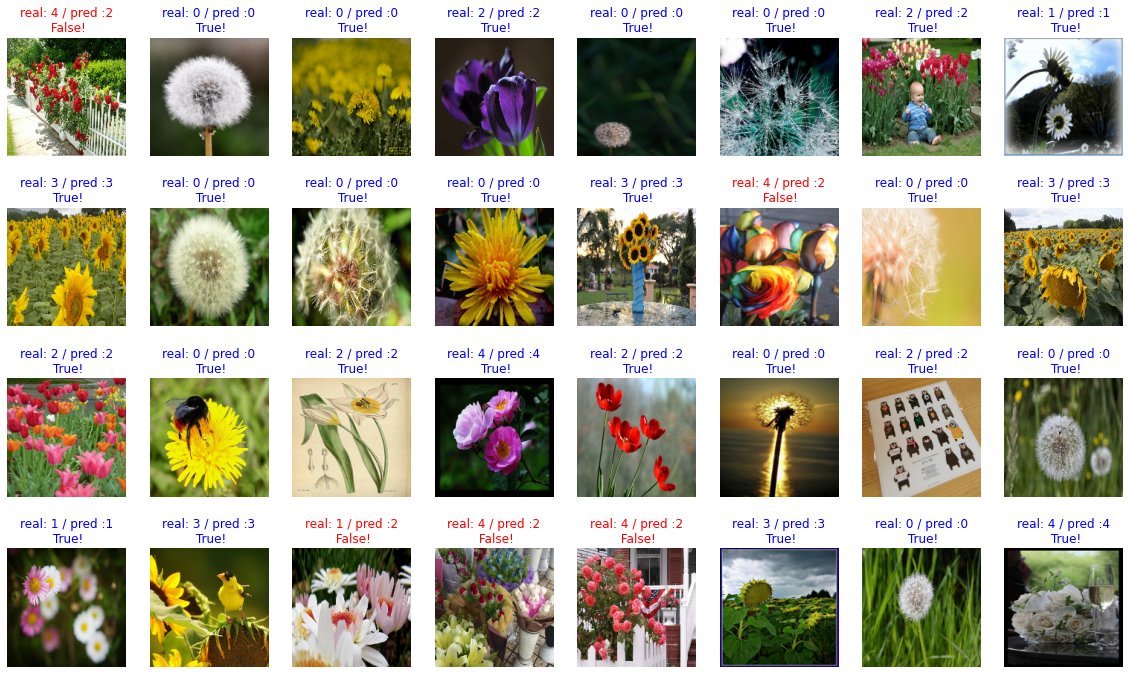

In [20]:
#시각화 및 결과확인
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, prediction2)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [21]:
# 모델 저장

import os

checkpoint_dir =  "./flower_classifier/checkpoint"
checkpoint_file_path = os.path.join(checkpoint_dir, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
    os.mkdir('checkpoint_dir')
    
vgg16_edit_model.save_weights(checkpoint_file_path)     # checkpoint 파일 생성

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

checkpoint 파일 생성 OK!!


### Step 6. 모델 활용하기

In [22]:
# 이미지 폴더 조회 확인
img_dir_path = "./flower_classifier/imgs"

os.path.exists(img_dir_path)

# 이미지 예측  함수로 정의
def show_and_predict_image(dirpath, filename, img_size=160):
    filepath = os.path.join(dirpath, filename)
    image = load_img(filepath, target_size=(img_size, img_size))
    
    plt.imshow(image)
    plt.axis('off')
    
    image = img_to_array(image).reshape(1, img_size, img_size, 3)
    p1 = vgg16_edit_model.predict(image)
    
    prediction = p1[0]
    print(prediction)

    
    dandelion_percentage = round(prediction[0] * 100)
    tulip_percentage = round(prediction[1] * 100)
    daisy_percentage = round(prediction[2] * 100)
    sunflwers_percentage = round(prediction[3] * 100)
    roses_percentage = round(prediction[4] * 100)
    
    print(f"This image seems {dandelion_percentage}% dandelion")
    print(f"This image seems {tulip_percentage}% tulip")
    print(f"This image seems {daisy_percentage}% daisy")
    print(f"This image seems {sunflwers_percentage}% sunflwers")
    print(f"This image seems {roses_percentage}% roses")

[0. 0. 0. 1. 0.]
[[0. 0. 0. 1. 0.]]
This image seems 0.0% dandelion
This image seems 0.0% tulip
This image seems 0.0% daisy
This image seems 100.0% sunflwers
This image seems 0.0% roses


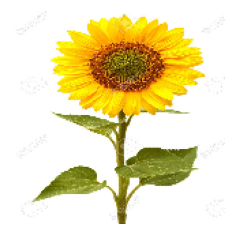

In [23]:
# 모델 활용 이미지 예측

filename = 'sun-01.jpg'


show_and_predict_image(img_dir_path, filename)

[0. 1. 0. 0. 0.]
[[0. 1. 0. 0. 0.]]
This image seems 0.0% dandelion
This image seems 100.0% tulip
This image seems 0.0% daisy
This image seems 0.0% sunflwers
This image seems 0.0% roses


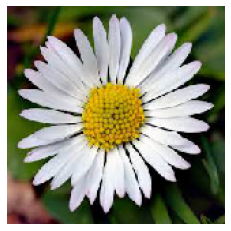

In [25]:
# 모델 활용 이미지 예측

filename = 'daisy-01.jpg'

show_and_predict_image(img_dir_path, filename)

[0.         0.         0.14256452 0.         0.8574355 ]
[[0.         0.         0.14256452 0.         0.8574355 ]]
This image seems 0.0% dandelion
This image seems 0.0% tulip
This image seems 14.0% daisy
This image seems 0.0% sunflwers
This image seems 86.0% roses


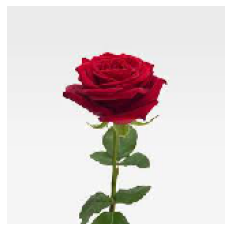

In [26]:
# 모델 활용 이미지 예측

filename = 'roses.jpg'

show_and_predict_image(img_dir_path, filename)

[0. 0. 1. 0. 0.]
[[0. 0. 1. 0. 0.]]
This image seems 0.0% dandelion
This image seems 0.0% tulip
This image seems 100.0% daisy
This image seems 0.0% sunflwers
This image seems 0.0% roses


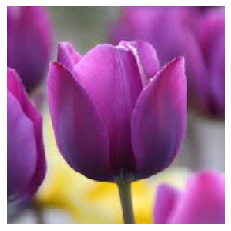

In [27]:
# 모델 활용 이미지 예측

filename = 'tuplip-01.jpg'

show_and_predict_image(img_dir_path, filename)

### batch size 32 / learning late 0.0001 / epcho 15 / optimzer RMSprop / loss  categorical_crossentropy

<img src="imgs/01.png" alt="Drawing" style="width: 500px;"/>
- epoch를 최초 5에서 7, 10 15으로 올려서 성능을 70 ~80대 후반대까지 개선..   
- batch size 조정 32 <-> 16   
- optimizer Adam으로 loss categorical_hinge 으로 변경해서 실행   









### batch size 32 / learning late 0.0001 / epcho 7 / optimzer RMSprop / loss  categorical_crossentropy




<img src="imgs/02-t1.png" alt="Drawing" style="width: 500px;"/>
<img src="imgs/03-t1.png" alt="Drawing" style="width: 500px;"/>


###  batch size 16 / learning late 0.0003 / epcho 10 / optimzer Adam / loss  categorical_hinge
<img src="imgs/02-adam_cateHinge.png" alt="Drawing" style="width: 500px;"/>

